In [1]:

%load_ext autoreload
%autoreload 2

In [34]:
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt
from imview import pltlib
import pandas as pd
from pygeotools.lib import warplib,geolib,iolib,malib,filtlib,timelib
import os,sys,glob,shutil
from debris_cover_smb import glac_dyn, constants, geospatial
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

## Ngozumpa

In [269]:
%cd /nobackup/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Ngozumpa/SMB_data/

/nobackupp11/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Ngozumpa/SMB_data


In [270]:
constants.rgi_dicts['ngozumpa']

'RGI60-15.03473'

In [271]:
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts['ngozumpa']}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts['ngozumpa']}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts['ngozumpa']}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts['ngozumpa']}.tif"

In [272]:
ls $model1_H_fn

/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.03473.tif


In [277]:


vx_fn = '20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif'
vy_fn = '20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif'
vx_millan_fn,vy_millan_fn,vm_millan_fn = constants.fetch_millan_velocity('ngozumpa')
divq2_concensus_fn = 'ngozumpa_farinotti_2012-12-23_to_2015-01-15_divQ2.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts['ngozumpa'])).to_crs("EPSG:32645")
H_fn = constants.fetch_farinotti_thickness('ngozumpa')
millan_H_fn = constants.fetch_millan_thickness('ngozumpa')
ds_list = warplib.memwarp_multi_fn([H_fn,model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn,vx_millan_fn,vy_millan_fn,vm_millan_fn,divq2_concensus_fn],extent='last')
H,model1,model2,model3,model4,millan_H,vx,vy,vx_millan,vy_millan,vm_millan,divq2_consensus = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 50.0
Extent: [466125.0, 3089921.0, 476775.0, 3104071.0]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 12: /nobackupp11/sbhusha1/reference_data/farinotti_2019_ice_thickness/RGI60-15/RGI60-15.03473_thickness.tif
nl: 283 ns: 213 res: 50.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 12: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.03473.tif
nl: 283 ns: 213 res: 50.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 12: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_RGI60-15.03473.tif
nl: 283 ns: 213 res: 50.000
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 12: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_RGI60-15.03473.tif
nl: 283 ns: 213 res: 50.000
100 - done.
0..

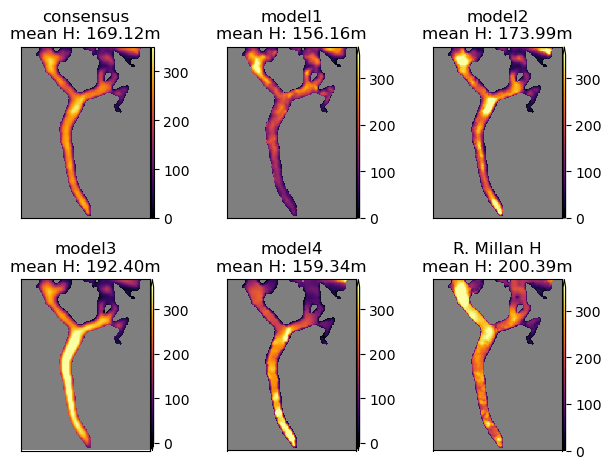

In [278]:
f,ax = plt.subplots(2,3)
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']


h_models = [H,model1,model2,model3,model4,millan_H]
common_mask = malib.common_mask(h_models)
for idx,axa in enumerate(ax.ravel()):
    h = np.ma.array(h_models[idx],mask=common_mask)
    mean = np.ma.mean(h)
    plt_title = f"{models_title[idx]}\nmean H: {mean :.2f}m"
    pltlib.iv(h,ax=axa,cmap='inferno',clim=(0,350),title=plt_title)
    

In [279]:
H_list = [model1,model2,model3,model4,millan_H]
H_mask = malib.common_mask(H_list+[vx,vy,divq2_consensus])
H_list = [np.ma.array(H,mask=H_mask) for H in H_list]

Lengthscales in m: [107.12274551391602, 201.09445571899414, 288.5719299316406, 389.2282485961914, 482.14683532714844, 581.2414169311523, 676.1622619628906, 768.077392578125, 866.0538482666016, 962.3796844482422, 1059.2257690429688, 1157.2996520996094, 1255.5630493164062, 1351.2846374511719, 1445.6370544433594, 1546.8331909179688, 1643.0986022949219, 1738.7176513671875, 1839.3843078613281, 1933.0810546875]
Lengthscales in pixels: [ 2.14  4.02  5.78  7.78  9.64 11.62 13.52 15.36 17.32 19.24 21.18 23.14
 25.12 27.02 28.92 30.94 32.86 34.78 36.78 38.66]
Applying gaussian smoothing filter with size 3 and sigma 0.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 7 and sigma 1.000 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 9 and s

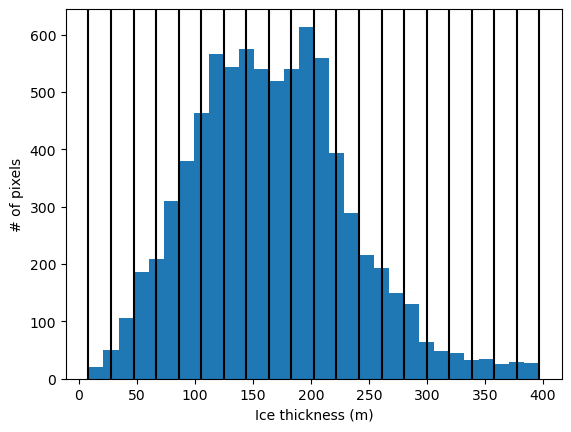

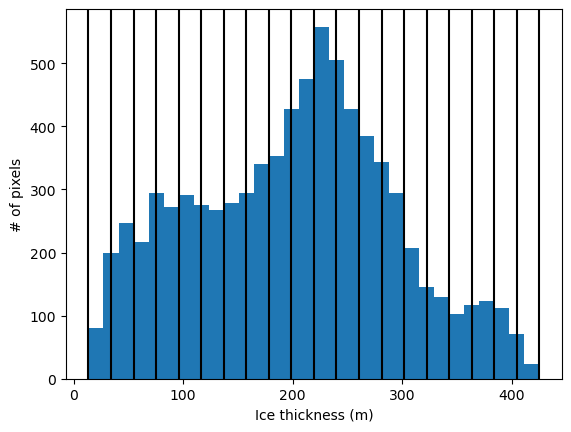

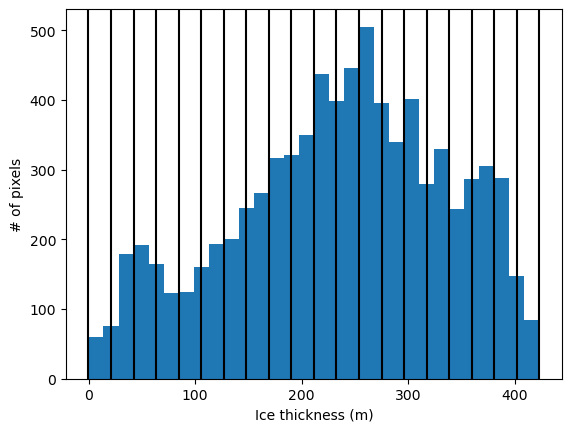

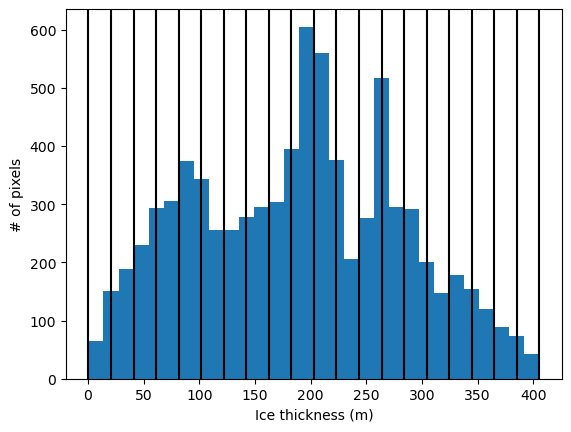

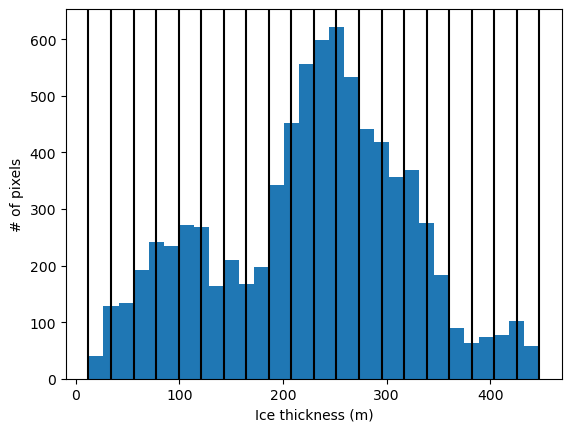

In [281]:
res = geolib.get_res(ds_list[0])[0]
num_thic_div_divq2 = 20
lengthscale_factor = 5
flux_models = []
for idx,model in enumerate(H_list):
    px_indices,lengtscales = glac_dyn.thickness_division(model,n=num_thic_div_divq2,factor=[lengthscale_factor],
                                                         res=res)
    flux_models.append(glac_dyn.compute_simple_flux_div(vx,vy,model,v_col_f=0.8,
        dx=res,dy=res,eo=1,smooth=True,px_lengthscale=lengtscales,lookup_indexes=px_indices))

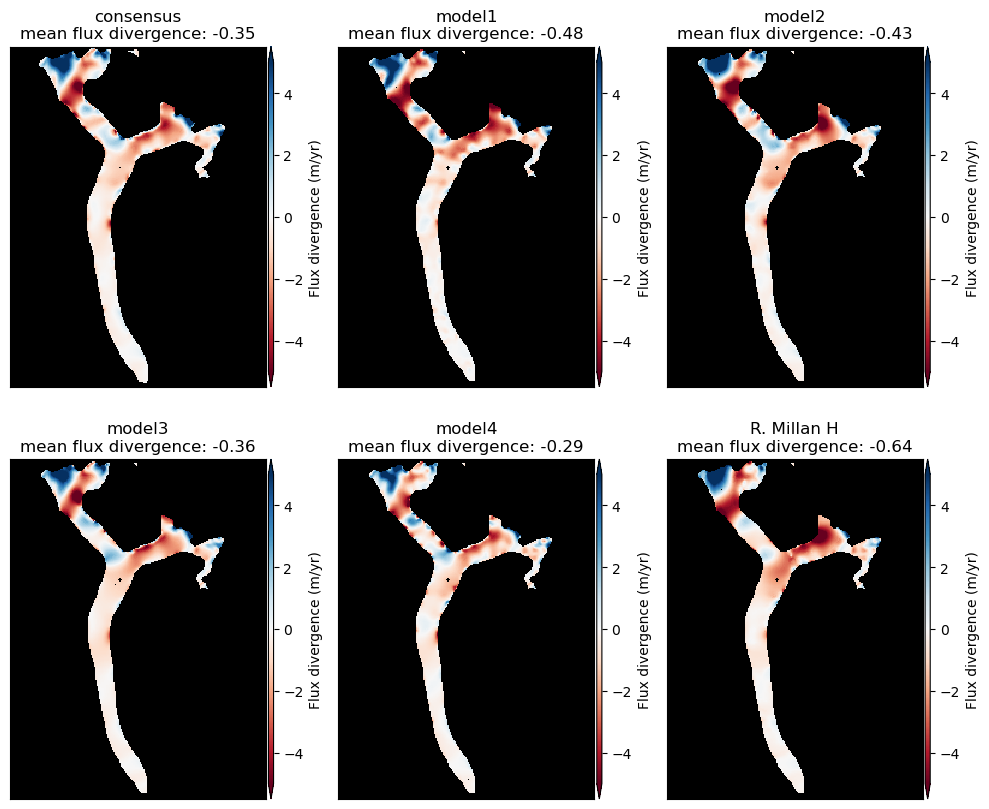

In [282]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
flux_models = [geospatial.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0]) for flux in flux_models] 
#common_mask = malib.common_mask(flux_models)
flux_models = [np.ma.array(flux,mask=divq2_consensus.mask) for flux in flux_models]
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-5,5)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate([divq2_consensus]+flux_models):
    
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)


Lengthscales in m: [116.54562950134277, 213.20981979370117, 321.2134552001953, 427.9206848144531, 539.7009658813477, 644.0854644775391, 755.8489227294922, 865.2825927734375, 980.3939819335938, 1083.0227661132812, 1195.6896209716797, 1301.7269897460938, 1411.5556335449219, 1517.1807861328125, 1633.6257934570312, 1734.0957641601562, 1842.9428100585938, 1966.2417602539062, 2080.5410766601562, 2168.8018798828125]
Lengthscales in pixels: [ 2.34  4.26  6.42  8.56 10.8  12.88 15.12 17.3  19.6  21.66 23.92 26.04
 28.24 30.34 32.68 34.68 36.86 39.32 41.62 43.38]
Applying gaussian smoothing filter with size 3 and sigma 0.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 7 and sigma 1.000 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 9 and sigma 1.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 11 

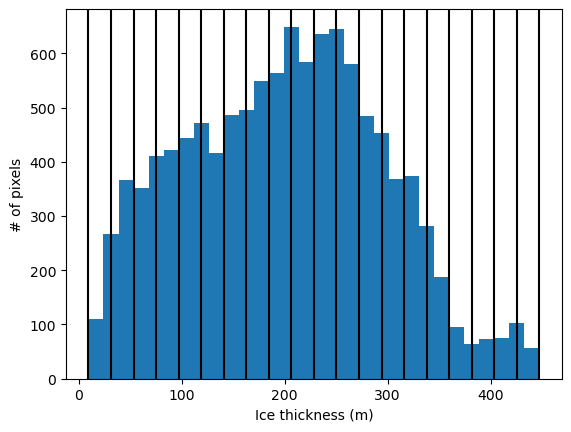

In [293]:
px_indices,lengtscales = glac_dyn.thickness_division(millan_H,n=num_thic_div_divq2,factor=[lengthscale_factor],
                                                     res=res)
millan_flux_v_h = glac_dyn.compute_simple_flux_div(vx_millan,vy_millan,millan_H,v_col_f=0.8,
        dx=res,dy=res,eo=1,smooth=True,px_lengthscale=lengtscales,lookup_indexes=px_indices)

Text(0.5, 1.0, 'Millan H & V\nmean flux divergence: -1.77')

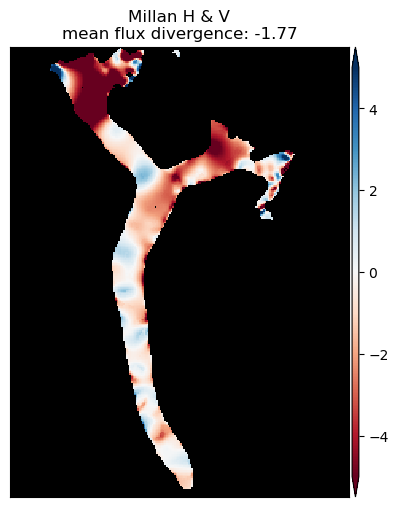

In [298]:
f,ax = plt.subplots()


millan_flux_v_h = np.ma.array(millan_flux_v_h,mask=divq2_consensus.mask)
mean = millan_flux_v_h.mean()
pltlib.iv(millan_flux_v_h,ax=ax,cmap=cmap,clim=clim)
plt_title = f"Millan H & V\nmean flux divergence: {mean :.2f}"
ax.set_title(plt_title)

In [299]:
melt_df = pd.read_csv('ngozumpa_farinotti_2012-12-23_to_2015-01-15_altitudnal_meltstats.csv')
area_wt_mb = (melt_df['area_total']*melt_df['med_total_dhdt']).sum()/(melt_df['area_total'].sum())

In [300]:
area_wt_mb

-1.272866636641248

In [302]:
(0.19/1.27)*100

14.960629921259844

In [323]:
1.77/0.35

5.057142857142858

## Langtang

In [254]:
%cd /nobackup/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Langtang/SMB_data/

/nobackupp11/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Langtang/SMB_data


In [255]:
glac_name = 'langtang'
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"

In [256]:


vx_fn = '20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_1.tif'
vy_fn = '20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_1.tif'
divq2_concensus_fn = 'langtang_farinotti_2015-02-22_to_2016-01-07_divQ2.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts[glac_name])).to_crs("EPSG:32645")
H_fn = constants.fetch_farinotti_thickness(glac_name)
millan_H_fn = constants.fetch_millan_thickness(glac_name)
ds_list = warplib.memwarp_multi_fn([model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn,divq2_concensus_fn],extent='last')
model1,model2,model3,model4,millan_H,vx,vy,divq2_consensus = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 25.0
Extent: [368087.5, 3121737.5, 375912.5, 3139937.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.04121.tif
nl: 728 ns: 313 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_RGI60-15.04121.tif
nl: 728 ns: 313 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_RGI60-15.04121.tif
nl: 728 ns: 313 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_RGI60-15.04121.tif
nl: 728 ns: 313 res: 25.000
100 

In [257]:
H_list = [model1,model2,model3,model4,millan_H]
H_mask = malib.common_mask(H_list+[vx,vy,divq2_consensus])
H_list = [np.ma.array(H,mask=H_mask) for H in H_list]

In [262]:
for H in H_list:
    print(H.shape)


(728, 313)
(728, 313)
(728, 313)
(728, 313)
(728, 313)


Lengthscales in m: [125.03637313842773, 218.73458862304688, 318.3445358276367, 432.64591217041016, 538.3934020996094, 645.8601379394531, 756.5179443359375, 864.7157287597656, 972.2343444824219, 1085.8870697021484, 1190.9671783447266, 1305.2253723144531, 1406.9561767578125, 1508.1784057617188, 1617.0497131347656, 1698.2240295410156, 1867.2756958007812, 1950.1969909667969, 2067.5682067871094, 2164.1949462890625]
Lengthscales in pixels: [ 5.    8.76 12.72 17.32 21.52 25.84 30.28 34.6  38.88 43.44 47.64 52.2
 56.28 60.32 64.68 67.92 74.68 78.   82.72 86.56]
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 9 and sigma 1.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 13 and sigma 2.000 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 17 and sigma 2.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 2

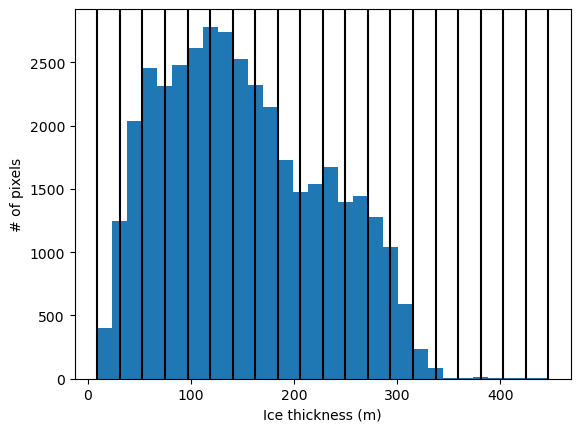

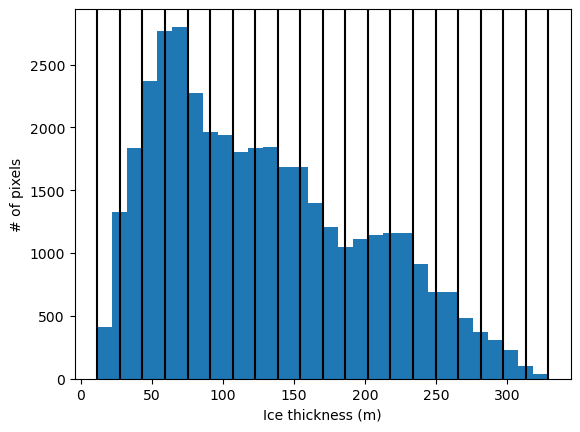

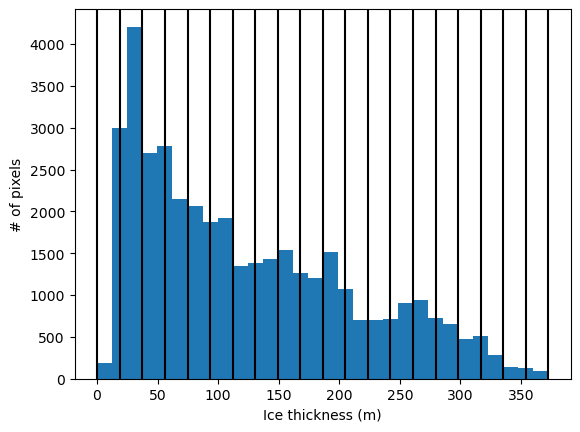

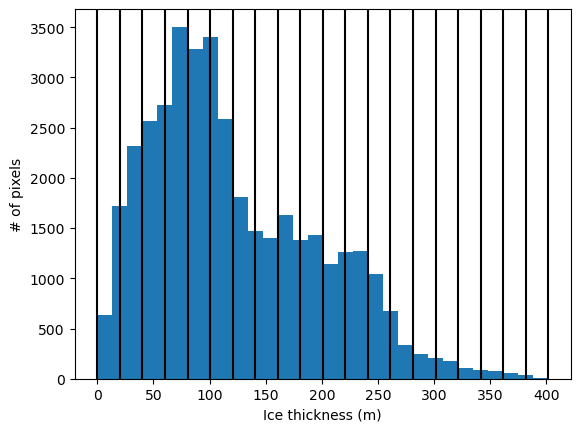

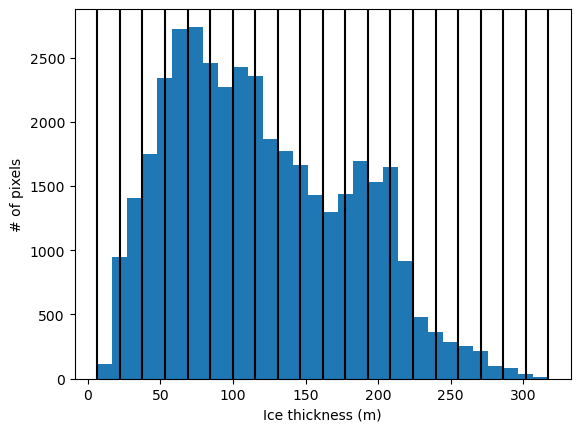

In [263]:
res = geolib.get_res(ds_list[0])[0]
num_thic_div_divq2 = 20
lengthscale_factor = 5
flux_models = []
for idx,model in enumerate(H_list):
    px_indices,lengtscales = glac_dyn.thickness_division(model,n=num_thic_div_divq2,factor=[lengthscale_factor],
                                                         res=res)
    flux_models.append(glac_dyn.compute_simple_flux_div(vx,vy,model,v_col_f=0.8,
        dx=res,dy=res,eo=1,smooth=True,px_lengthscale=lengtscales,lookup_indexes=px_indices))

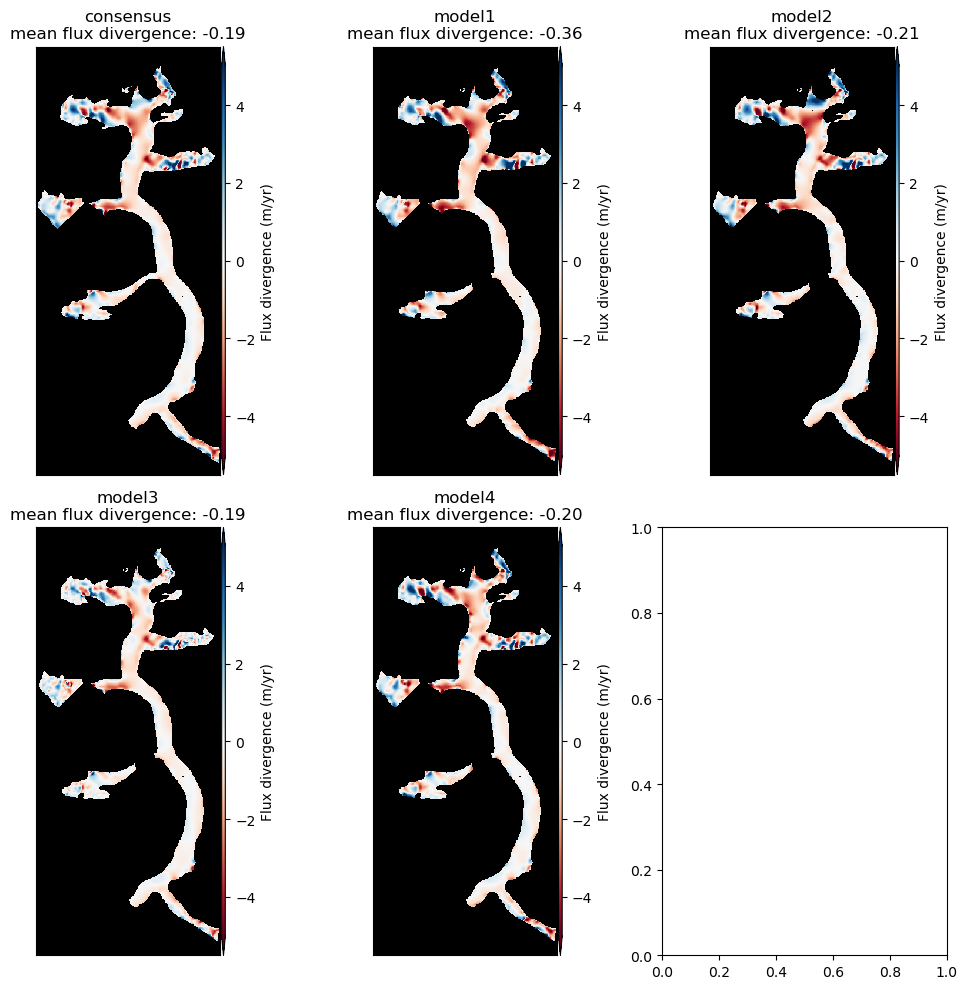

In [264]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
flux_models = [geospatial.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0]) for flux in flux_models] 
#common_mask = malib.common_mask(flux_models)
flux_models = [np.ma.array(flux,mask=divq2_consensus.mask) for flux in flux_models]
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-5,5)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate([divq2_consensus]+flux_models[:-1]):
    
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)


In [265]:
melt_df = pd.read_csv('langtang_farinotti_2015-02-22_to_2016-01-07_altitudnal_meltstats.csv')
area_wt_mb = (melt_df['area_total']*melt_df['med_total_dhdt']).sum()/(melt_df['area_total'].sum())
area_wt_mb

-1.1258096292207926

In [266]:
-0.36+0.19

-0.16999999999999998

In [268]:
((0.17)/(1.13))*100

15.04424778761062

<Axes: >

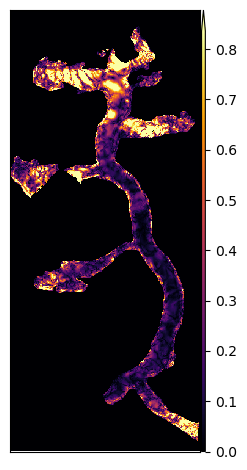

In [31]:
f,ax = plt.subplots()
pltlib.iv(malib.mad(np.ma.dstack([flux_models]),axis=0),ax=ax,cmap='inferno')

## Imja Lhotse Shar

In [239]:
%cd /nobackup/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/ImjaLhotseShar/SMB_data/

/nobackupp11/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/ImjaLhotseShar/SMB_data


In [240]:
glac_name = 'imja'
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"

In [243]:




vx_fn = '20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_1.tif'
vy_fn = '20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_1.tif'
divq2_concensus_fn = 'imja_farinotti_2015-10-02_to_2016-10-29_divQ2.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts[glac_name])).to_crs("EPSG:32645")
H_fn = constants.fetch_farinotti_thickness(glac_name)
millan_H_fn = constants.fetch_millan_thickness(glac_name)
ds_list = warplib.memwarp_multi_fn([model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn,divq2_concensus_fn],extent='last')
model1,model2,model3,model4,millan_H,vx,vy,divq2_consensus = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 25.0
Extent: [492962.5, 3084912.5, 498337.5, 3092462.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.03743.tif
nl: 302 ns: 215 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_RGI60-15.03743.tif
nl: 302 ns: 215 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_RGI60-15.03743.tif
nl: 302 ns: 215 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_RGI60-15.03743.tif
nl: 302 ns: 215 res: 25.000
100 

In [244]:
H_list = [model1,model2,model3,model4,millan_H]
H_mask = malib.common_mask(H_list+[vx,vy,divq2_consensus])
H_list = [np.ma.array(H,mask=H_mask) for H in H_list]

In [247]:
divq2_consensus.mean()

-0.2943231624965109

Lengthscales in m: [78.92184734344482, 118.90510559082031, 162.7176856994629, 205.2936553955078, 250.39554595947266, 296.1771774291992, 342.8883361816406, 387.9796600341797, 433.31775665283203, 479.0827941894531, 522.9673767089844, 570.9585189819336, 618.6566925048828, 660.0595855712891, 707.9014587402344, 751.1792755126953, 797.4410247802734, 844.1909027099609, 887.5394439697266, 931.5439605712891]
Lengthscales in pixels: [ 3.16  4.76  6.52  8.2  10.   11.84 13.72 15.52 17.32 19.16 20.92 22.84
 24.76 26.4  28.32 30.04 31.88 33.76 35.52 37.28]
Applying gaussian smoothing filter with size 3 and sigma 0.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 7 and sigma 1.000 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 9 and sigma 1.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 11 and sigma 

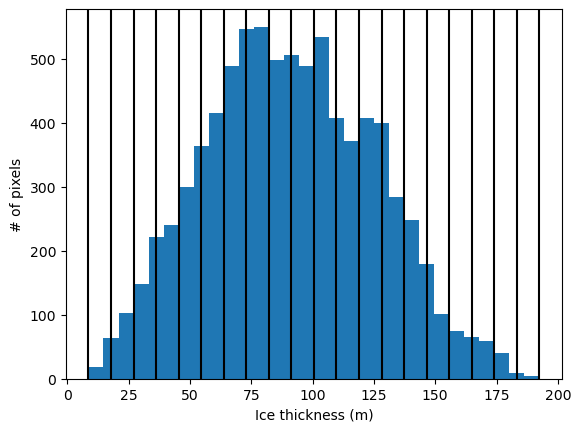

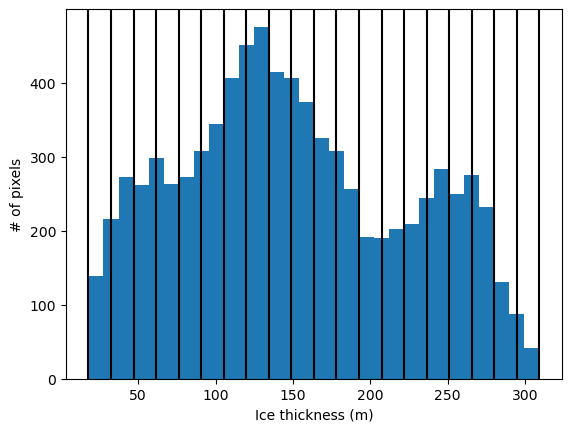

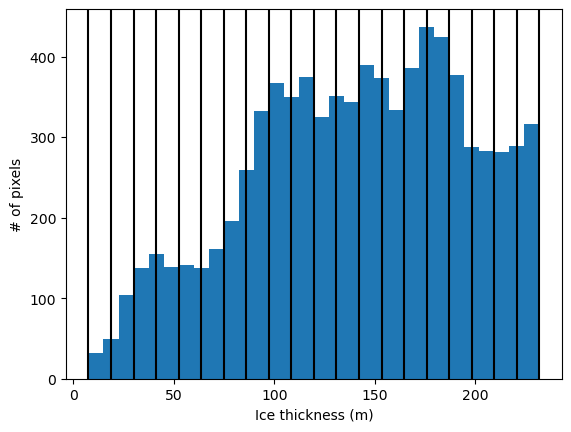

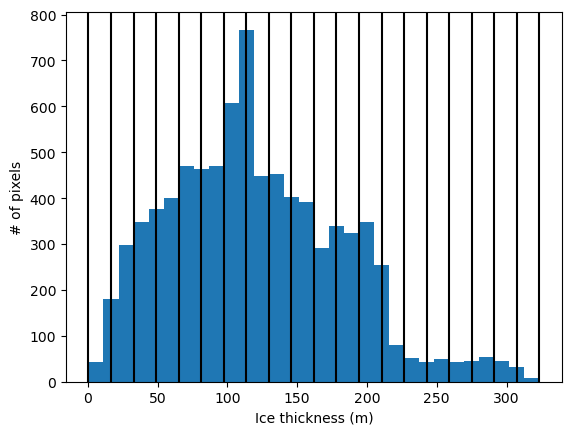

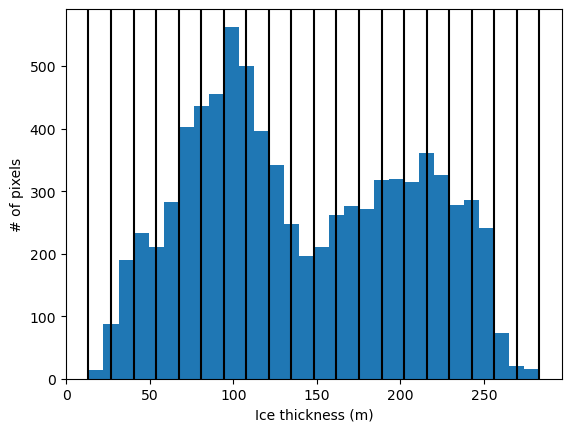

In [248]:
res = geolib.get_res(ds_list[0])[0]
num_thic_div_divq2 = 20
lengthscale_factor = 5
flux_models = []
for idx,model in enumerate(H_list):
    px_indices,lengtscales = glac_dyn.thickness_division(model,n=num_thic_div_divq2,factor=[lengthscale_factor],
                                                         res=res)
    flux_models.append(glac_dyn.compute_simple_flux_div(vx,vy,model,v_col_f=0.8,
        dx=res,dy=res,eo=1,smooth=True,px_lengthscale=lengtscales,lookup_indexes=px_indices))

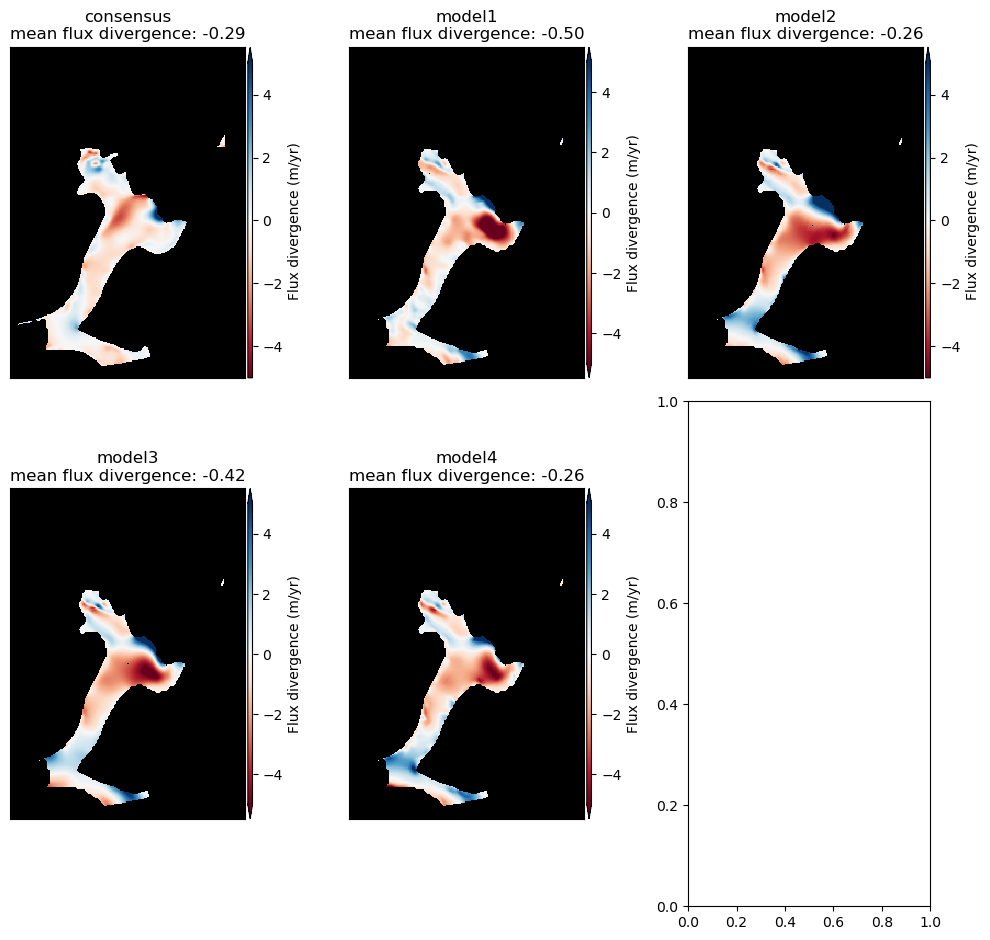

In [249]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
flux_models = [geospatial.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0]) for flux in flux_models] 
#common_mask = malib.common_mask(flux_models)
flux_models = [np.ma.array(flux,mask=divq2_consensus.mask) for flux in flux_models]
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-5,5)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate([divq2_consensus]+flux_models[:-1]):
    
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)


In [ ]:
im

In [122]:
melt_df = pd.read_csv('imja_farinotti_2015-10-02_to_2016-10-29_altitudnal_meltstats.csv')
area_wt_mb = (melt_df['area_total']*melt_df['med_total_dhdt']).sum()/(melt_df['area_total'].sum())
area_wt_mb

-0.9364422177313725

In [251]:
(0.24/0.94)*100

25.53191489361702

## Khumbu

In [214]:
%cd /nobackup/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Khumbu/SMB_data/

/nobackupp11/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Khumbu/SMB_data


In [215]:
glac_name = 'khumbu'
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"

In [228]:


vx_fn = '20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_b1.tif'
vy_fn = '20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_b1.tif'
divq2_concensus_fn = 'khumbu_farinotti_2015-11-02_to_2016-10-25_divQ2.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts[glac_name])).to_crs("EPSG:32645")
H_fn = constants.fetch_farinotti_thickness(glac_name)
millan_H_fn = constants.fetch_millan_thickness(glac_name)
ds_list = warplib.memwarp_multi_fn([model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn,divq2_concensus_fn],extent='last')
model1,model2,model3,model4,millan_H,vx,vy,divq2_consensus = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 25.0
Extent: [481512.5, 3090512.5, 488437.5, 3099662.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.03733.tif
nl: 366 ns: 277 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_RGI60-15.03733.tif
nl: 366 ns: 277 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_RGI60-15.03733.tif
nl: 366 ns: 277 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_RGI60-15.03733.tif
nl: 366 ns: 277 res: 25.000
100 

In [230]:
divq2_consensus.shape

(366, 277)

In [226]:
H_list = [model1,model2,model3,model4,millan_H]
H_mask = malib.common_mask(H_list+[vx,vy,divq2_consensus])
H_list = [np.ma.array(H,mask=H_mask) for H in H_list]

In [231]:
divq2_consensus.mean()

-0.6236283428853103

Lengthscales in m: [135.58274269104004, 204.4065284729004, 280.1986503601074, 361.3812255859375, 439.90821838378906, 522.5595855712891, 602.9804611206055, 681.3639068603516, 762.210693359375, 847.2255706787109, 925.0307464599609, 1001.2342834472656, 1083.9403533935547, 1168.240966796875, 1246.5825653076172, 1331.1300659179688, 1415.7376098632812, 1496.563720703125, 1575.14404296875, 1645.0369262695312]
Lengthscales in pixels: [ 5.44  8.16 11.2  14.44 17.6  20.92 24.12 27.24 30.48 33.88 37.   40.04
 43.36 46.72 49.88 53.24 56.64 59.88 63.   65.8 ]
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 9 and sigma 1.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 11 and sigma 1.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 15 and sigma 2.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 17 and s

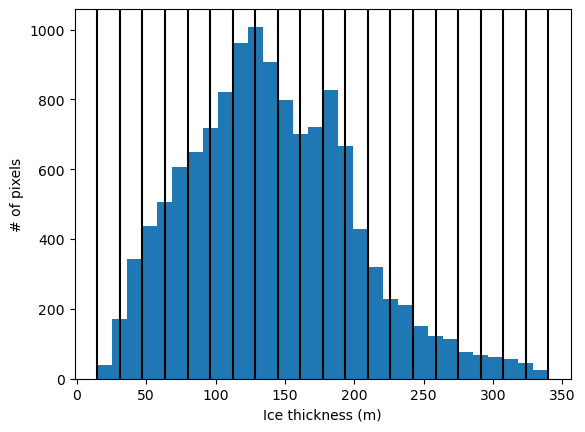

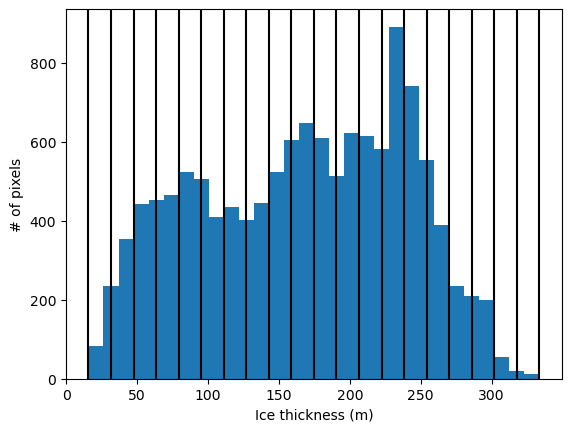

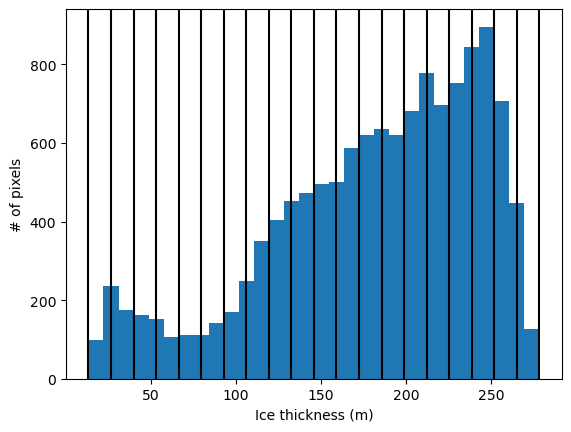

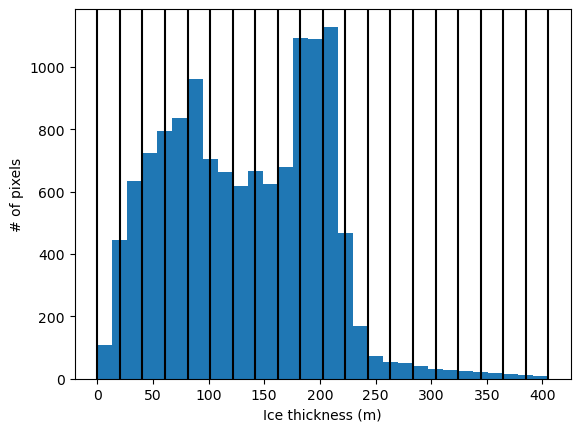

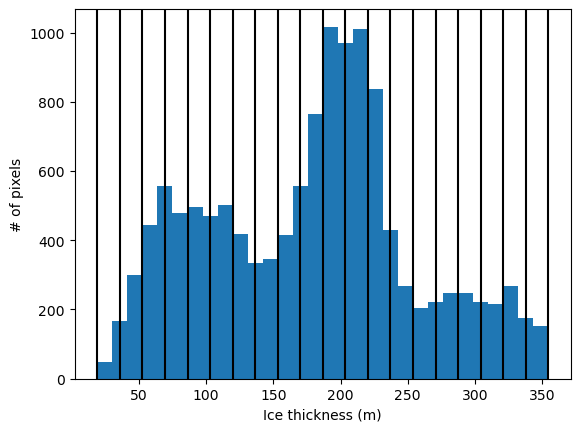

In [232]:
res = geolib.get_res(ds_list[0])[0]
num_thic_div_divq2 = 20
lengthscale_factor = 5
flux_models = []
for idx,model in enumerate(H_list):
    px_indices,lengtscales = glac_dyn.thickness_division(model,n=num_thic_div_divq2,factor=[lengthscale_factor],
                                                         res=res)
    flux_models.append(glac_dyn.compute_simple_flux_div(vx,vy,model,v_col_f=0.8,
        dx=res,dy=res,eo=1,smooth=True,px_lengthscale=lengtscales,lookup_indexes=px_indices))

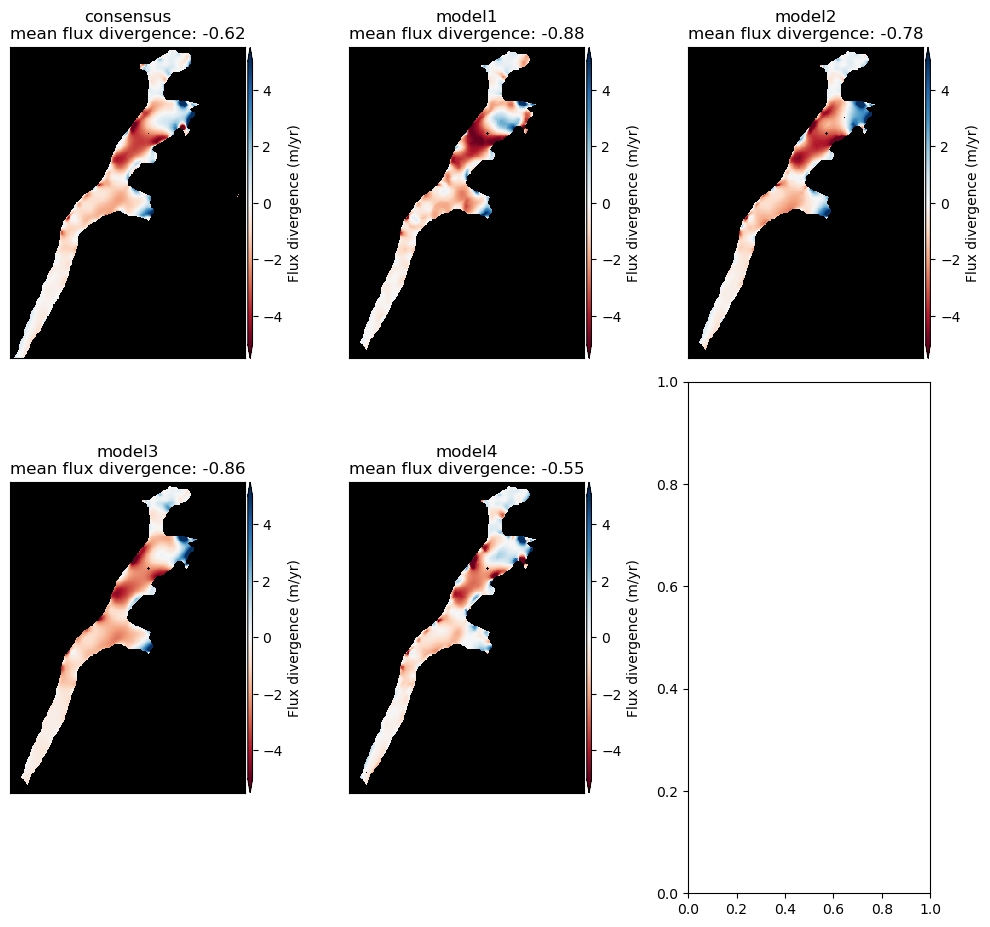

In [235]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
flux_models = [geospatial.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0]) for flux in flux_models] 
#common_mask = malib.common_mask(flux_models)
flux_models = [np.ma.array(flux,mask=divq2_consensus.mask) for flux in flux_models]
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-5,5)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate([divq2_consensus]+flux_models[:-1]):
    
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)


In [236]:
0.88 - 0.55

0.32999999999999996

In [149]:
melt_df = pd.read_csv('khumbu_farinotti_2015-11-02_to_2016-10-25_altitudnal_meltstats.csv')
area_wt_mb = (melt_df['area_total']*melt_df['med_total_dhdt']).sum()/(melt_df['area_total'].sum())
area_wt_mb

-1.5798295725376101

In [238]:
(0.33/1.58)*100

20.88607594936709

## Lirung

In [184]:
%cd /nobackup/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Lirung/SMB_data/

/nobackupp11/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Lirung/SMB_data


In [185]:
glac_name = 'lirung'
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"

In [202]:


vx_fn = '20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_1_masked_gauss_fill51px_1.tif'
vy_fn = '20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_1_masked_gauss_fill51px_1.tif'
divq2_concensus_fn = 'lirung_farinotti_2016-11-06_to_2017-12-22_divQ2.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts[glac_name])).to_crs("EPSG:32645")
H_fn = constants.fetch_farinotti_thickness(glac_name)
millan_H_fn = constants.fetch_millan_thickness(glac_name)
ds_list = warplib.memwarp_multi_fn([model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn,divq2_concensus_fn],extent='last')
model1,model2,model3,model4,millan_H,vx,vy,divq2_consensus = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 25.0
Extent: [357337.5, 3122712.5, 359212.5, 3126237.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.04045.tif
2 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_RGI60-15.04045.tif
3 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_RGI60-15.04045.tif
4 of 8: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_RGI60-15.04045.tif
5 of 8: /nobackupp11/sbhusha1/reference_data/millan_thickness/RGI-13-15/RGI60-15.04045_millan_thickness.tif
nl: 141 ns: 75 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...6 of 8: 20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx

In [203]:
H_list = [model1,model2,model3,model4,millan_H]
H_mask = malib.common_mask(H_list+[vx,vy,divq2_consensus])
H_list = [np.ma.array(H,mask=H_mask) for H in H_list]

In [204]:
len(H_list)

5

In [205]:
divq2_consensus.mean()

-0.12128334664975468

Lengthscales in m: [88.16862106323242, 115.2182388305664, 150.51570892333984, 185.38137435913086, 216.3063621520996, 250.14598846435547, 284.5481491088867, 319.5012855529785, 354.22962188720703, 388.8097381591797, 421.61617279052734, 457.740478515625, 491.06090545654297, 521.9798278808594, 555.1860427856445, 590.5710601806641, 629.8143005371094, 650.9213256835938, 688.7889099121094, 717.271728515625]
Lengthscales in pixels: [ 3.52  4.6   6.04  7.4   8.64 10.   11.4  12.8  14.16 15.56 16.88 18.32
 19.64 20.88 22.2  23.64 25.2  26.04 27.56 28.68]
Applying gaussian smoothing filter with size 3 and sigma 0.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 7 and sigma 1.000 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 7 and sigma 1.000 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 9 and sigma 

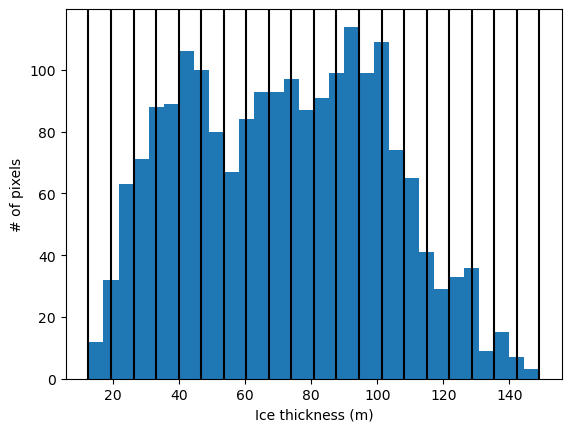

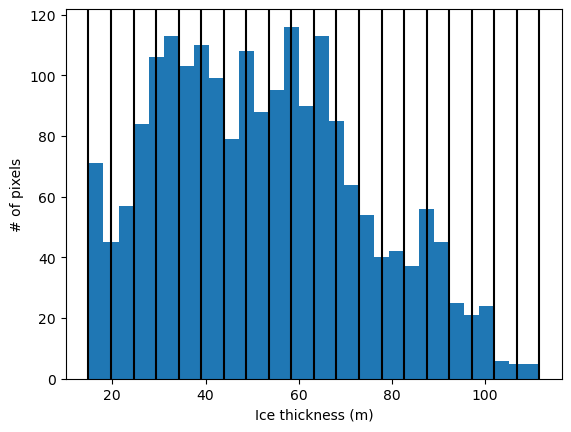

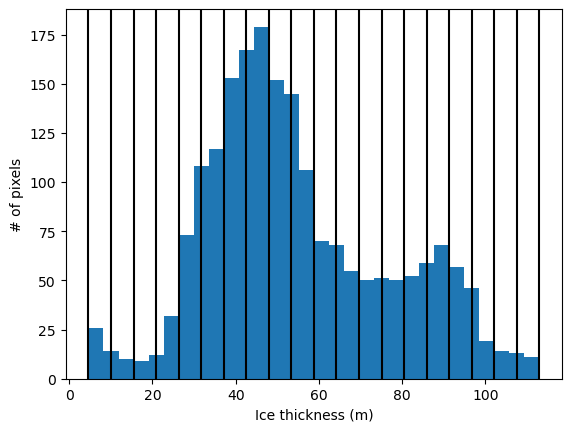

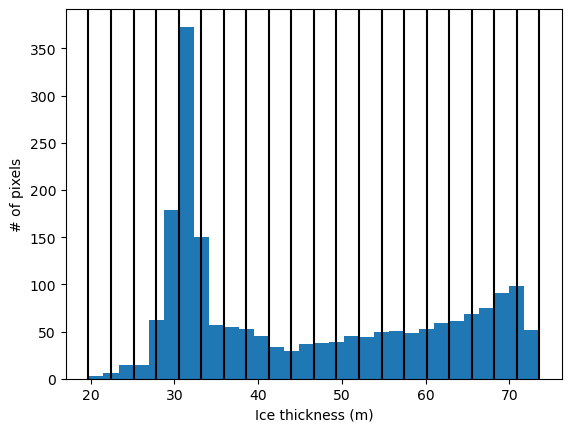

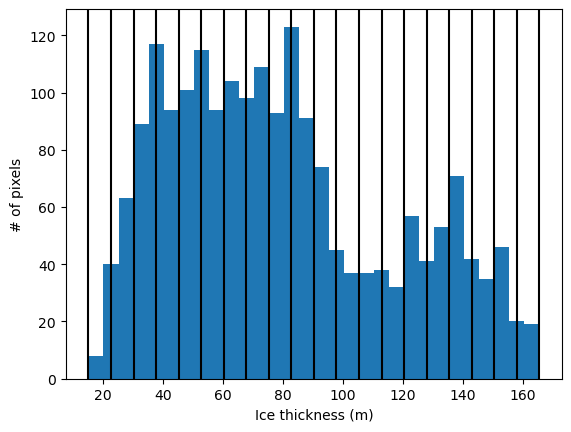

In [206]:
res = geolib.get_res(ds_list[0])[0]
num_thic_div_divq2 = 20
lengthscale_factor = 5
flux_models = []
for idx,model in enumerate(H_list):
    px_indices,lengtscales = glac_dyn.thickness_division(model,n=num_thic_div_divq2,factor=[lengthscale_factor],
                                                         res=res)
    flux_models.append(glac_dyn.compute_simple_flux_div(vx,vy,model,v_col_f=0.8,
        dx=res,dy=res,eo=1,smooth=True,px_lengthscale=lengtscales,lookup_indexes=px_indices))

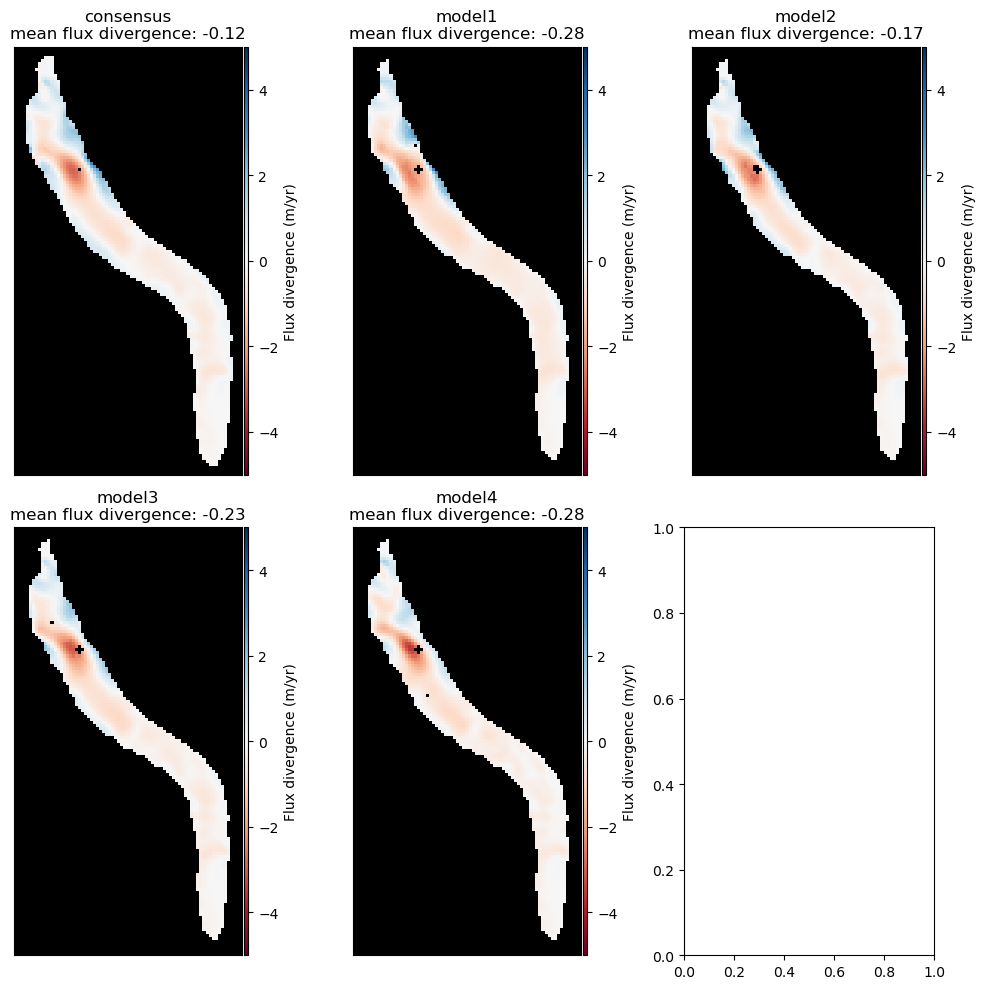

In [208]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
flux_models = [geospatial.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0]) for flux in flux_models] 
#common_mask = malib.common_mask(flux_models)
flux_models = [np.ma.array(flux,mask=divq2_concensus.mask) for flux in flux_models]
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-5,5)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate([divq2_concensus]+flux_models[:-1]):
    
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)


In [211]:
melt_df = pd.read_csv('lirung_farinotti_2016-11-06_to_2017-12-22_altitudnal_meltstats.csv')
area_wt_mb = (melt_df['area_total']*melt_df['med_total_dhdt']).sum()/(melt_df['area_total'].sum())
area_wt_mb

-1.811922967532345

In [213]:
(0.16/1.81)*100

8.83977900552486

## Black Changri Nup

In [303]:
%cd /nobackup/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/BlackChangriNup/SMB_data/

/nobackupp11/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/BlackChangriNup/SMB_data


In [304]:
glac_name = 'changri_nup'
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"

In [317]:
vx_fn = '20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_b1.tif'
vy_fn = '20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_b1.tif'
divq2_concensus_fn = 'black_changri_nup_farinotti_2015-11-02_to_2016-10-25_divQ2.tif'
lag_smb_fn = 'black_changri_nup_farinotti_2015-11-02_to_2016-10-25_smb_dhdt.tif'
glac_shp = gpd.read_file('/nobackup/sbhusha1/hma/agu22_scratch/Black_changri_with_accumulation_area2.shp')
debris_thickness_fn = constants.fetch_rounce_debris_thickness(glac_name)
H_fn = constants.fetch_farinotti_thickness(glac_name)
millan_H_fn = constants.fetch_millan_thickness(glac_name)
ds_list = warplib.memwarp_multi_fn([model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn,debris_thickness_fn,lag_smb_fn,divq2_concensus_fn],extent='last')
model1,model2,model3,model4,millan_H,vx,vy,debris,lag_smb,divq2_consensus = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 25.0
Extent: [476612.5, 3094162.5, 482987.5, 3099437.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 10: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.03734.tif
2 of 10: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_RGI60-15.03734.tif
3 of 10: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_RGI60-15.03734.tif
4 of 10: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_RGI60-15.03734.tif
5 of 10: /nobackupp11/sbhusha1/reference_data/millan_thickness/RGI-13-15/RGI60-15.03734_millan_thickness.tif
nl: 211 ns: 255 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...6 of 10: 20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin

In [308]:
H_list = [model1,model2,model3,model4,millan_H]
H_mask = malib.common_mask(H_list+[vx,vy,divq2_consensus])
H_list = [np.ma.array(H,mask=H_mask) for H in H_list]

Lengthscales in m: [72.75017261505127, 107.10033416748047, 139.15550231933594, 172.1784782409668, 206.19796752929688, 238.07687759399414, 277.3987007141113, 313.70677947998047, 343.27720642089844, 378.3332824707031, 412.37274169921875, 448.29261779785156, 481.6020965576172, 514.9003601074219, 552.1883392333984, 585.2838516235352, 612.3987197875977, 653.8930511474609, 682.9269409179688, 717.1585845947266]
Lengthscales in pixels: [ 2.92  4.28  5.56  6.88  8.24  9.52 11.08 12.56 13.72 15.12 16.48 17.92
 19.28 20.6  22.08 23.4  24.48 26.16 27.32 28.68]
Applying gaussian smoothing filter with size 3 and sigma 0.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 7 and sigma 1.000 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 9 and si

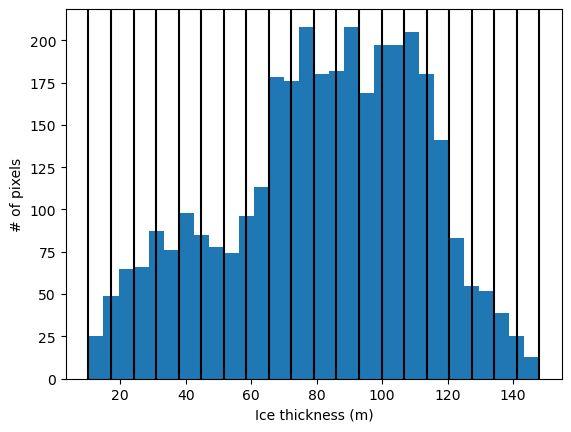

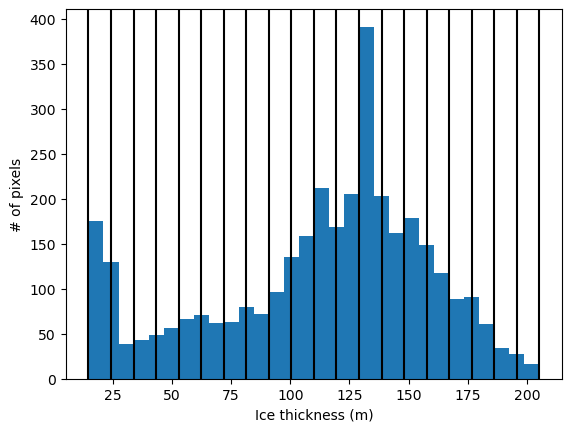

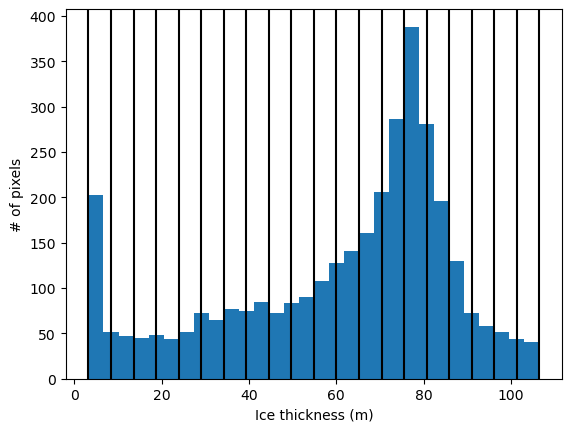

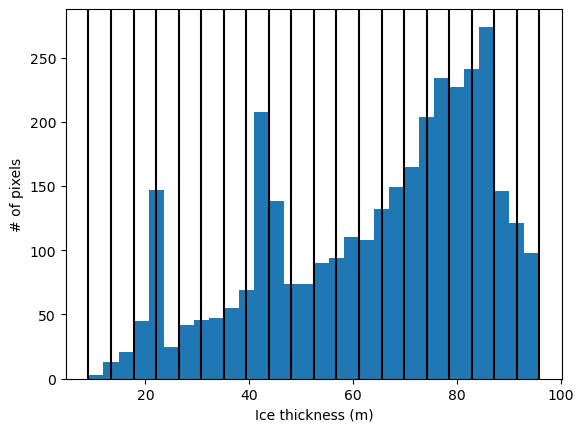

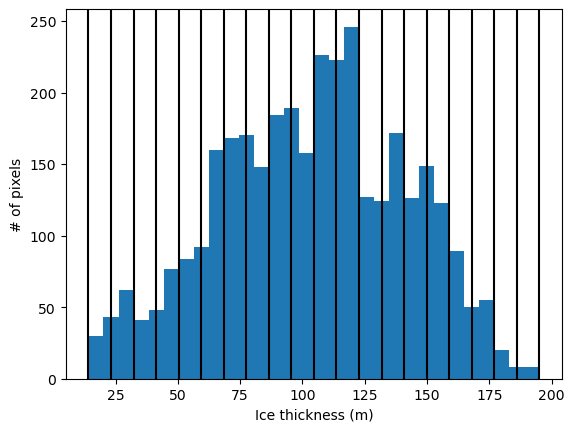

In [309]:
res = geolib.get_res(ds_list[0])[0]
num_thic_div_divq2 = 20
lengthscale_factor = 5
flux_models = []
for idx,model in enumerate(H_list):
    px_indices,lengtscales = glac_dyn.thickness_division(model,n=num_thic_div_divq2,factor=[lengthscale_factor],
                                                         res=res)
    flux_models.append(glac_dyn.compute_simple_flux_div(vx,vy,model,v_col_f=0.8,
        dx=res,dy=res,eo=1,smooth=True,px_lengthscale=lengtscales,lookup_indexes=px_indices))

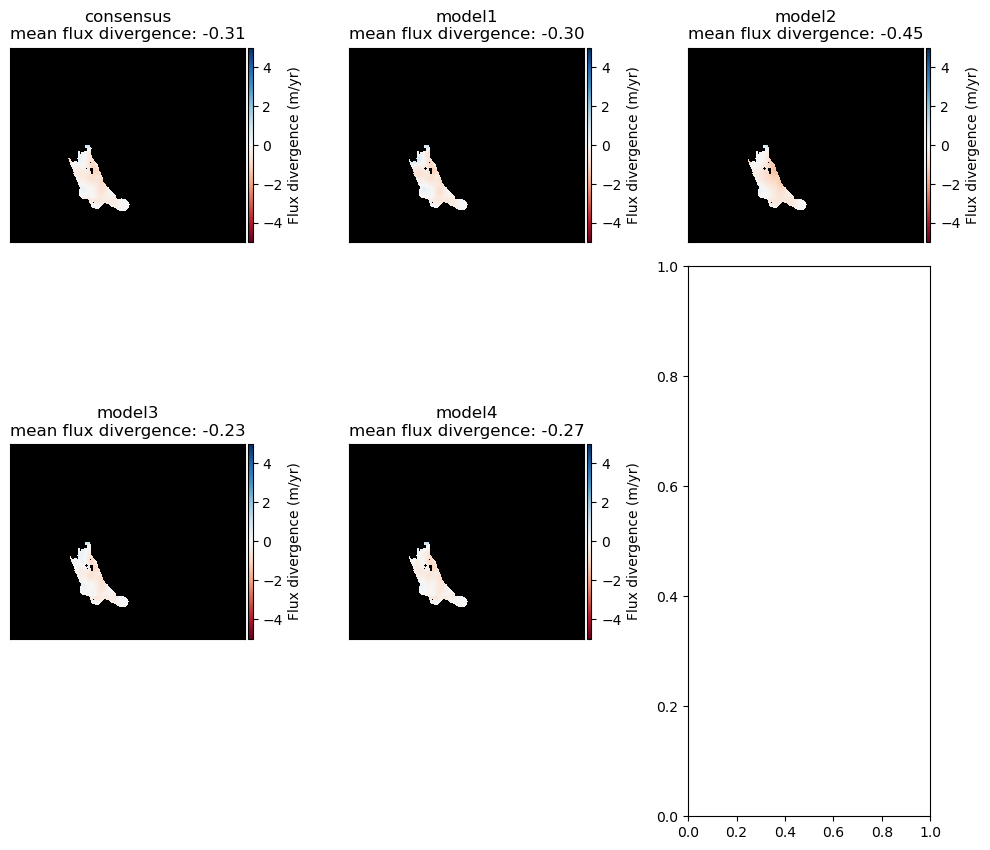

In [315]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
flux_models = [geospatial.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0]) for flux in flux_models] 
#common_mask = malib.common_mask(flux_models)
flux_models = [np.ma.array(flux,mask=divq2_consensus.mask) for flux in flux_models]
debris_mask = malib.common_mask([divq2_consensus,debris])
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-5,5)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate([divq2_consensus]+flux_models[:-1]):
    flux = np.ma.array(flux,mask=debris_mask)
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)


In [319]:
np.ma.array(lag_smb,mask=debris_mask).mean()

-1.1738699063810132

In [320]:
(0.12/1.17)*100

10.256410256410255